In [4]:
# Importing necessary packages
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sn
import matplotlib.pyplot as plt

In [5]:
# Mount Google Drive if not already mounted
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# Load the dataset
dataset = pd.read_csv("/content/drive/MyDrive/project files/finalfile (1).csv")

# Separate features (x) and target variable (y)
x = dataset.drop(columns=["fault"])
y = dataset["fault"]

In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Standardize or normalize input features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
# Decision Tree Classifier
decision_tree_classifier = DecisionTreeClassifier(random_state=0)

# Train the decision tree model
decision_tree_classifier.fit(X_train, y_train)


DecisionTreeClassifier(random_state=0)

In [10]:
# Make predictions on the test set
y_pred = decision_tree_classifier.predict(X_test)

# Evaluate the model
cm = confusion_matrix(y_test, y_pred)

In [11]:
index = ['Normal', 'Inner Race (0.021")']
columns = ['Normal', 'Inner Race (0.021")']
cm_df = pd.DataFrame(cm, columns, index)


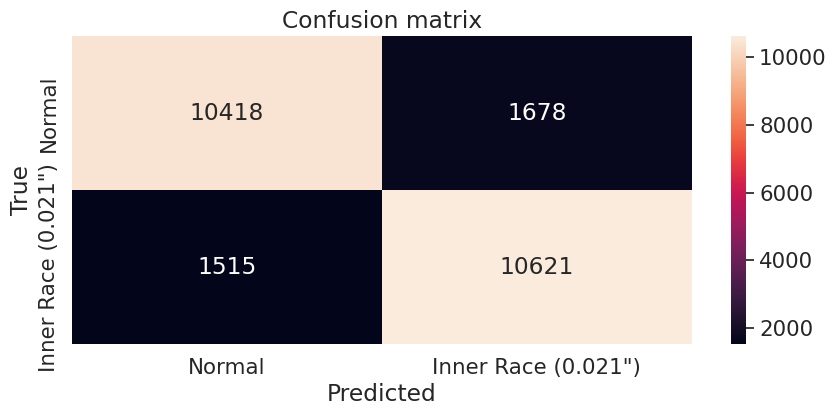

                     precision    recall  f1-score   support

             Normal       0.87      0.86      0.87     12096
Inner Race (0.021")       0.86      0.88      0.87     12136

           accuracy                           0.87     24232
          macro avg       0.87      0.87      0.87     24232
       weighted avg       0.87      0.87      0.87     24232



['/content/drive/MyDrive/project files/decision_tree_model.joblib']

In [12]:
plt.figure(figsize=(10, 4))
sn.set(font_scale=1.4)  # for label size
sn.heatmap(cm_df, annot=True, fmt='g')  # font size
plt.title('Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Print the classification report
cr = classification_report(y_test, y_pred, target_names=['Normal', 'Inner Race (0.021")'])
print(cr)

# Save the decision tree model
path_to_save_model = '/content/drive/MyDrive/project files/decision_tree_model.joblib'
from joblib import dump
dump(decision_tree_classifier, path_to_save_model)
